# Task-3: Customer Churn Prediction

> Description: Develop a model to predict customer churn for a subscription based service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn

## Collecting & unzipping data

In [1]:
import zipfile
data=zipfile.ZipFile('archive.zip')
data.extractall()
data.close()

## Importing libraries & dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.shape

(10000, 14)

## Exploratory Data Analysis

In [8]:
# Removing extra spaces for columns
data.columns=data.columns.str.strip()

In [9]:
# Converting all columns to lowercase
data.columns=data.columns.str.lower()

In [10]:
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

<Axes: xlabel='exited', ylabel='count'>

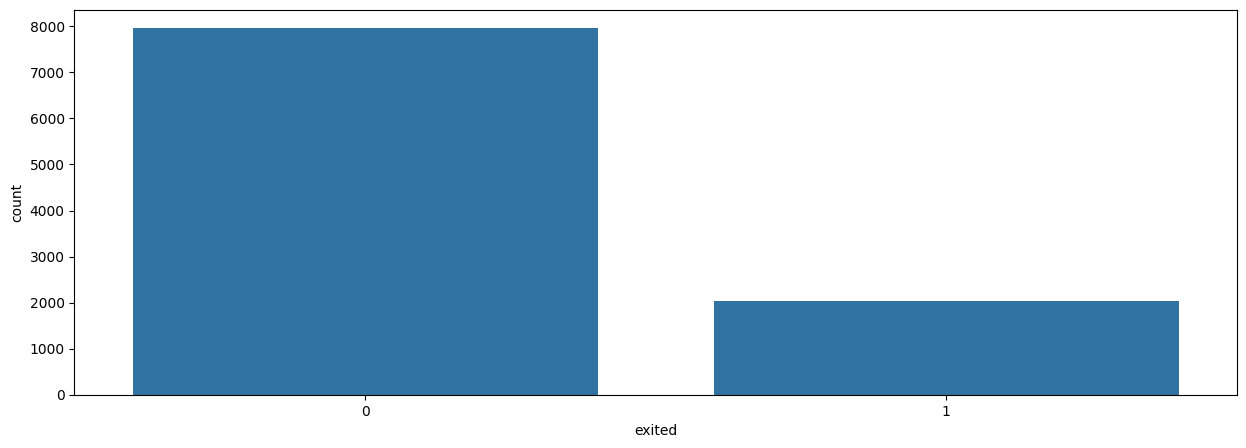

In [11]:
# Count plot of exited customer
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='exited')

In [13]:
data['exited'].value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

Note: We can see the data imbalance in exited columns. We have to downsample

In [15]:
from sklearn.utils import resample
majority=data[data['exited']==0]
minority=data[data['exited']==1]

In [16]:
majority.shape,minority.shape

((7963, 14), (2037, 14))

In [17]:
majority_downsample=resample(majority,n_samples=2037,replace=False,random_state=23)

In [18]:
majority_downsample.shape

(2037, 14)

In [19]:
dataset=pd.concat([majority_downsample,minority])

In [20]:
dataset.shape

(4074, 14)

In [21]:
dataset['exited'].value_counts()

exited
0    2037
1    2037
Name: count, dtype: int64

In [22]:
# Dropping irrelevant columns
cols=['rownumber', 'customerid', 'surname','geography','gender']
dataset.drop(columns=cols,inplace=True)
dataset.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
8643,754,40,2,160625.17,1,0,1,3554.63,0
2263,757,49,2,0.00,2,0,0,164482.92,0
9147,636,35,9,95478.17,1,0,0,169286.74,0
7128,553,38,1,181110.13,2,1,0,184544.59,0
5384,727,28,1,0.00,1,1,0,40357.39,0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 8643 to 9998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      4074 non-null   int64  
 1   age              4074 non-null   int64  
 2   tenure           4074 non-null   int64  
 3   balance          4074 non-null   float64
 4   numofproducts    4074 non-null   int64  
 5   hascrcard        4074 non-null   int64  
 6   isactivemember   4074 non-null   int64  
 7   estimatedsalary  4074 non-null   float64
 8   exited           4074 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 318.3 KB


<Axes: >

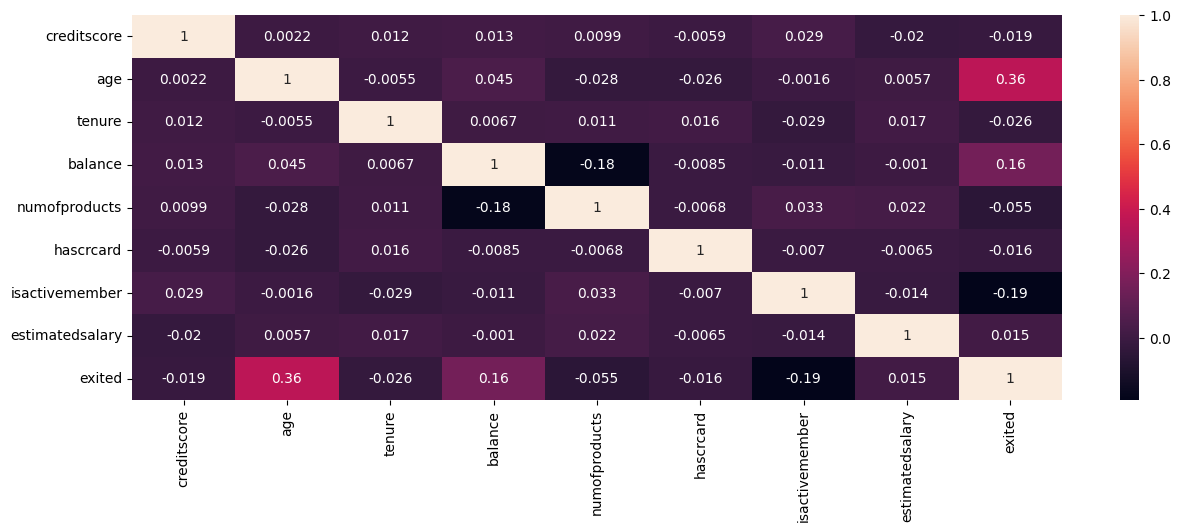

In [24]:
# Plotting the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(dataset.corr(),annot=True)

## Splitting the dataset

In [27]:
dataset.to_csv('cleaned_data.csv')

In [25]:
from sklearn.model_selection import train_test_split
x=dataset.drop(columns=['exited'])
y=dataset['exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [26]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3259, 8), (3259,), (815, 8), (815,))

## Standardize the data

In [28]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

## Model Creation and evaluation

#### 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print(f'Accuracy : {accuracy_score(y_pred_lr,y_test)}')

Accuracy : 0.6748466257668712


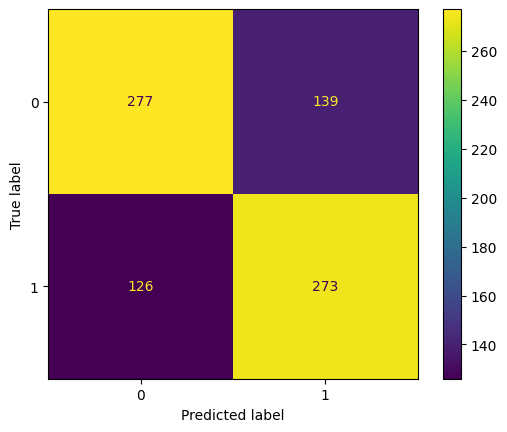

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
lr_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_lr,labels=lr.classes_),display_labels=lr.classes_)
lr_cmd.plot()

#### 2. Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [33]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(f'Accuracy : {accuracy_score(y_pred_rf,y_test)}')

Accuracy : 0.7595092024539877


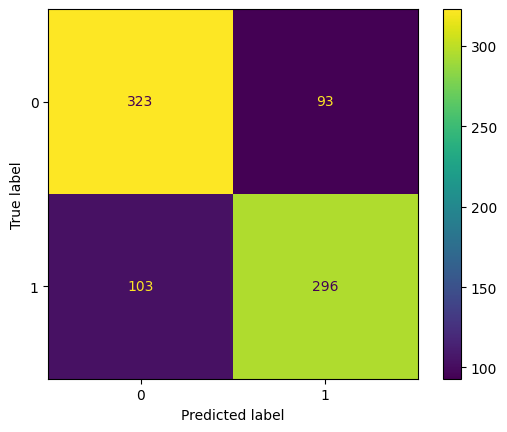

In [34]:
rf_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_rf,labels=rf.classes_),display_labels=rf.classes_)
rf_cmd.plot()

#### 3. Gradient Boosting Classifier

In [35]:
gbf=GradientBoostingClassifier()
gbf.fit(x_train,y_train)
y_pred_gbf=gbf.predict(x_test)
print(f'Accuracy : {accuracy_score(y_pred_gbf,y_test)}')

Accuracy : 0.7631901840490798


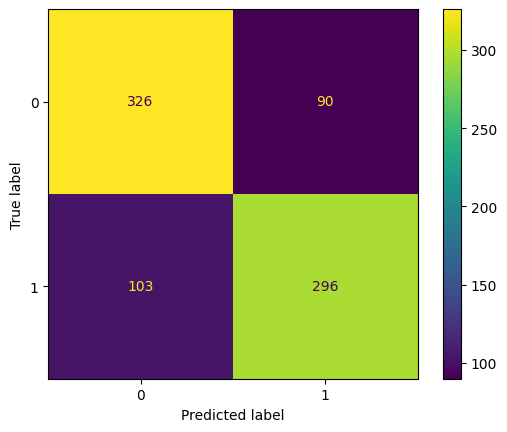

In [36]:
gbf_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_gbf,labels=gbf.classes_),display_labels=gbf.classes_)
gbf_cmd.plot()

#### 4. Ada Boost Classifier

In [37]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
y_pred_ac=ac.predict(x_test)
print(f'Accuracy : {accuracy_score(y_pred_ac,y_test)}')

Accuracy : 0.7386503067484662


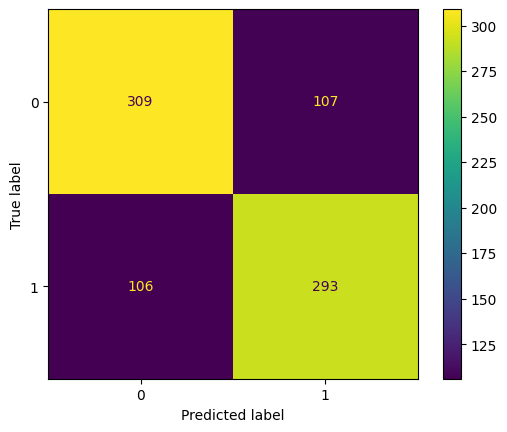

In [38]:
ac_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_ac,labels=ac.classes_),display_labels=ac.classes_)
ac_cmd.plot()

#### 5. Xgboost classifier

In [39]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print(f'Accuracy : {accuracy_score(y_pred_xgb,y_test)}')

Accuracy : 0.7276073619631902


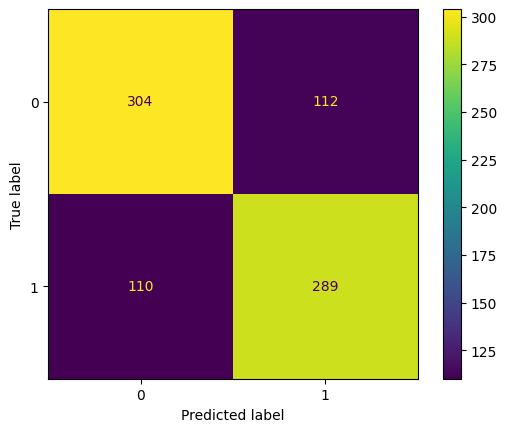

In [40]:
xgb_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_xgb,labels=xgb.classes_),display_labels=xgb.classes_)
xgb_cmd.plot()

## Saving the model

In [41]:
import pickle
pickle.dump(lr,open('LogisticRegression.pkl','wb'))
pickle.dump(rf,open('RandomForest.pkl','wb'))
pickle.dump(gbf,open('GradientBoostingClassifier.pkl','wb'))
pickle.dump(ac,open('AdaBoostClassifier.pkl','wb'))
pickle.dump(xgb,open('XGBoostClassifier.pkl','wb'))

### Hyper Parameter Tuning of Gradient Boosting Classifier

In [42]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [43]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [44]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [45]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


0.692 + or -0.021 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.688 + or -0.023 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.728 + or -0.017 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.747 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.716 + or -0.02 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.733 + or -0.017 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.76 + or -0.014 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.759 + or -0.018 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.738 + or -0.014 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.748 + or -0.017 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.754 + or -0.019 for the {'learning_rate': 0.01, 'max_de

In [46]:
gbf=GradientBoostingClassifier(learning_rate=0.01,max_depth=3,n_estimators=250)
gbf.fit(x_train,y_train)
y_pred_gbf=gbf.predict(x_test)
print(f'Accuracy : {accuracy_score(y_pred_gbf,y_test)}')

Accuracy : 0.7521472392638037


In [47]:
pickle.dump(gbf,open('best_model.pkl','wb'))